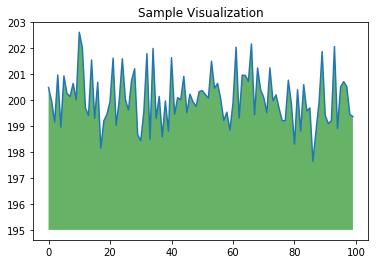

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from tensorflow.keras.layers import Dense, Dropout,Flatten
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


In [44]:
data = pd.read_csv('bank.csv')

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [6]:
data.isna().sum().sum()

0

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


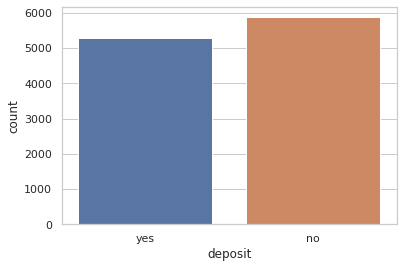

In [13]:

sns.set_theme(style="whitegrid")

sns.countplot(data['deposit'])

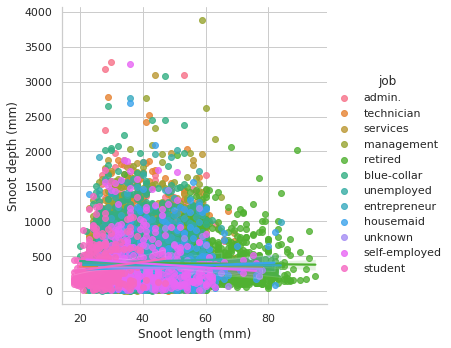

In [18]:
g = sns.lmplot(
    data=data,
    x="age", y="duration", hue="job",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")


In [45]:
data['default'].value_counts()
data=data.drop('default',axis=1)

In [46]:
slabelencoder = LabelEncoder()
data["job"] = labelencoder.fit_transform(data["job"])
labelencoder = LabelEncoder()
data["marital"] = labelencoder.fit_transform(data["marital"])
labelencoder = LabelEncoder()
data["education"] = labelencoder.fit_transform(data["education"])

labelencoder = LabelEncoder()
data["housing"] = labelencoder.fit_transform(data["housing"])
labelencoder = LabelEncoder()
data["loan"] = labelencoder.fit_transform(data["loan"])
labelencoder = LabelEncoder()
data["contact"] = labelencoder.fit_transform(data["contact"])
labelencoder = LabelEncoder()
data["month"] = labelencoder.fit_transform(data["month"])
labelencoder = LabelEncoder()
data["poutcome"] = labelencoder.fit_transform(data["poutcome"])
labelencoder = LabelEncoder()
data["deposit"] = labelencoder.fit_transform(data["deposit"])

In [47]:
data

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,1,0,8,8,9,2,172,5,0,0


In [48]:
X = data.drop(columns = ['deposit'], axis=1)
Y = data[['deposit']]

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [50]:
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [54]:
model = Sequential([
  Dense(128, activation='relu',input_dim= 15),
  Dense(256, activation='relu'),
  Dense(512, activation='relu'),
  Dense(1, activation='sigmoid')])

In [55]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])

In [56]:

history = model.fit(
    X_train_norm,
    Y_train,                
    epochs = 50,
    batch_size=10,
    validation_split=0.2,
    callbacks=[])

Epoch 1/50
625/625 [==============================] - 2s 3ms/step - loss: 0.5676 - accuracy: 0.7016 - val_loss: 0.5043 - val_accuracy: 0.7665
Epoch 2/50
625/625 [==============================] - 2s 3ms/step - loss: 0.5186 - accuracy: 0.7470 - val_loss: 0.5136 - val_accuracy: 0.7524
Epoch 3/50
625/625 [==============================] - 2s 3ms/step - loss: 0.5045 - accuracy: 0.7560 - val_loss: 0.4908 - val_accuracy: 0.7754
Epoch 4/50
625/625 [==============================] - 2s 3ms/step - loss: 0.5017 - accuracy: 0.7586 - val_loss: 0.4882 - val_accuracy: 0.7703
Epoch 5/50
625/625 [==============================] - 2s 3ms/step - loss: 0.4918 - accuracy: 0.7606 - val_loss: 0.4807 - val_accuracy: 0.7901
Epoch 6/50
625/625 [==============================] - 2s 3ms/step - loss: 0.4927 - accuracy: 0.7594 - val_loss: 0.5102 - val_accuracy: 0.7569
Epoch 7/50
625/625 [==============================] - 2s 3ms/step - loss: 0.4854 - accuracy: 0.7685 - val_loss: 0.4682 - val_accuracy: 0.7876
Epoch 

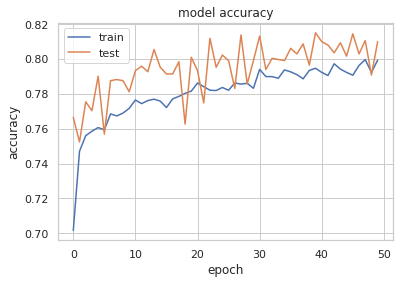

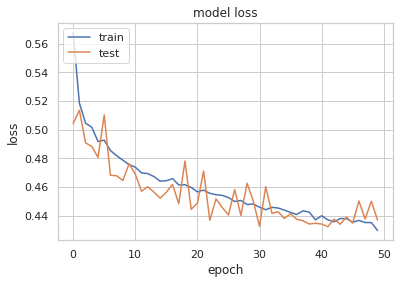

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()